In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

# Distributions
import scipy

In [3]:
student = pd.read_csv('data/student_data/student-mat.csv', sep=';')
student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
# checking the number of rows and columns in the data frame
student.shape

(395, 33)

In [5]:
student['G3'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

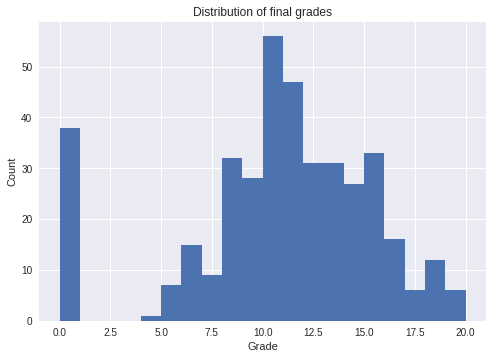

In [6]:
# plotting histogram of the final grade to check the distribution
plt.hist(student['G3'], bins=20)
plt.title('Distribution of final grades')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()

In [7]:
# finding the correlation between features and final grade
# negative correlation indicates that
# as that variable increases, the final grade decreases

# Note: This correlation is only between numeric values
student.corr()['G3'].sort_values()

failures     -0.360415
age          -0.161579
goout        -0.132791
traveltime   -0.117142
health       -0.061335
Dalc         -0.054660
Walc         -0.051939
freetime      0.011307
absences      0.034247
famrel        0.051363
studytime     0.097820
Fedu          0.152457
Medu          0.217147
G1            0.801468
G2            0.904868
G3            1.000000
Name: G3, dtype: float64

In [8]:
# if we want to use the categorical values as well
# we need to encode them

# One hot encoding is a process by which 
# categorical variables are converted into a form 
# that could be provided to ML algorithms 
# to do a better job in prediction.

# Select only categorical variables
category_df = student.select_dtypes(include=['object'])

# One hot encode the variables
dummy_df = pd.get_dummies(category_df)

# Put the grade back in the dataframe
# creates a new column G3 in the dummy_df
dummy_df['G3'] = student['G3']

# Find correlations with grade
dummy_df.corr()['G3'].sort_values()

higher_no           -0.182465
romantic_yes        -0.129970
Mjob_at_home        -0.115634
address_R           -0.105756
sex_F               -0.103456
paid_no             -0.101996
reason_course       -0.098950
internet_no         -0.098483
Mjob_other          -0.096477
guardian_other      -0.087774
schoolsup_yes       -0.082788
famsize_GT3         -0.081407
Pstatus_T           -0.058009
Fjob_other          -0.053483
nursery_no          -0.051568
school_MS           -0.045017
famsup_yes          -0.039157
reason_home         -0.021359
Fjob_services       -0.016108
activities_no       -0.016100
Fjob_at_home        -0.013385
activities_yes       0.016100
guardian_mother      0.022338
guardian_father      0.032493
famsup_no            0.039157
school_GP            0.045017
nursery_yes          0.051568
reason_other         0.052008
Fjob_health          0.057111
Mjob_teacher         0.057712
Pstatus_A            0.058009
Mjob_services        0.078429
famsize_LE3          0.081407
schoolsup_

In [9]:
# selecting the most correlated values and dropping the others
labels = student['G3']

# drop the school and grade columns
student = student.drop(['school', 'G1', 'G2'], axis='columns')
    
# One-Hot Encoding of Categorical Variables
student = pd.get_dummies(student)
    
# Find correlations with the Grade
most_correlated = student.corr().abs()['G3'].sort_values(ascending=False)   

# Maintain the top 8 most correlation features with Grade
most_correlated = most_correlated[:8]
most_correlated


G3            1.000000
failures      0.360415
Medu          0.217147
higher_yes    0.182465
higher_no     0.182465
age           0.161579
Fedu          0.152457
goout         0.132791
Name: G3, dtype: float64

In [10]:
student = student.loc[:, most_correlated.index]
student = student.drop(['higher_no'], axis='columns')

student.head()

,G3,failures,Medu,higher_yes,age,Fedu,goout
0,6,0,4,1,18,4,4
1,6,0,1,1,17,1,3
2,10,3,1,1,15,1,2
3,15,0,4,1,15,2,2
4,10,0,3,1,16,3,2


In [11]:
# splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(student, labels, 
                                                        test_size = 0.25,
                                                        random_state=42)

In [12]:
# Calculate mae and rmse
# mae - mean absolute error
# rmse - root mean square error
def evaluate_predictions(predictions, true):
    mae = np.mean(abs(predictions - true))
    rmse = np.sqrt(np.mean((predictions - true) ** 2))
    
    return mae, rmse

In [13]:
# Naive baseline is the median
median_pred = X_train['G3'].median()
median_preds = [median_pred for _ in range(len(X_test))]
true = X_test['G3']

In [14]:
# Display the naive baseline metrics
mb_mae, mb_rmse = evaluate_predictions(median_preds, true)
print('Median Baseline  MAE: {:.4f}'.format(mb_mae))
print('Median Baseline RMSE: {:.4f}'.format(mb_rmse))

Median Baseline  MAE: 3.7879
Median Baseline RMSE: 4.8252


In [15]:
# Evaluate several ml models by training on training set and testing on testing set
def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Linear Regression', 'ElasticNet Regression',
                      'Random Forest', 'Extra Trees', 'SVM',
                       'Gradient Boosted', 'Baseline']
    X_train = X_train.drop('G3', axis='columns')
    X_test = X_test.drop('G3', axis='columns')
    
    # Instantiate the models
    model1 = LinearRegression()
    model2 = ElasticNet(alpha=1.0, l1_ratio=0.5)
    model3 = RandomForestRegressor(n_estimators=50)
    model4 = ExtraTreesRegressor(n_estimators=50)
    model5 = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
    model6 = GradientBoostingRegressor(n_estimators=20)
    
    # Dataframe for results
    results = pd.DataFrame(columns=['mae', 'rmse'], index = model_name_list)
    
    # Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4, model5, model6]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        # Metrics
        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
        
        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, rmse]
    
    # Median Value Baseline Metrics
    baseline = np.median(y_train)
    baseline_mae = np.mean(abs(baseline - y_test))
    baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))
    
    results.loc['Baseline', :] = [baseline_mae, baseline_rmse]
    
    return results

In [16]:
results = evaluate(X_train, X_test, y_train, y_test)
results

,mae,rmse
Linear Regression,3.55577,4.49314
ElasticNet Regression,3.61061,4.57647
Random Forest,3.79199,4.79803
Extra Trees,3.96647,5.02747
SVM,3.58371,4.59575
Gradient Boosted,3.47083,4.36198
Baseline,3.78788,4.82523


In [17]:
# now you can subtract the difference between
# all the models and the baseline to see which one performs the best